# Part 1

In [1]:
import pandas as pd
import numpy as np
from helper import prepare_data, plot_decision_tree, plot_feature_importance, create_hierarchical_clustering, optimal_amount_of_clusters
from decision_trees import DecisionTree
from random_forest import RandomForest
from svm import SupportVectorMachines
from knn import KNearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances, cosine_distances
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from imblearn.over_sampling import SMOTE

In [2]:
df_wine = pd.read_csv('Data/winequality.txt', delim_whitespace = True)
df_wine_test = pd.read_csv('Data/winequalityadditional.txt', delim_whitespace = True)

In [3]:
df_wine.head(5)

,Fixed_acidity,Volatile_acidity,Critic_acid,Residual_sugar,Chlorides,Free_sulfur_dioxide,Total_sulfur_dioxide,Density,pH,Sulphates,Alcohol,Class
0,7.0,0.16,0.26,7.3,0.047,30.0,220.0,0.99622,3.38,0.58,10.100000,bad
1,7.6,0.18,0.28,7.1,0.041,29.0,110.0,0.99652,3.20,0.42,9.200000,bad
2,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,good
3,6.2,0.16,0.32,1.1,0.036,74.0,184.0,0.99096,3.22,0.41,11.000000,bad
4,6.8,0.11,0.42,1.1,0.042,51.0,132.0,0.99059,3.18,0.74,11.300000,good


In [4]:
df_wine.describe()

,Fixed_acidity,Volatile_acidity,Critic_acid,Residual_sugar,Chlorides,Free_sulfur_dioxide,Total_sulfur_dioxide,Density,pH,Sulphates,Alcohol
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,6.771900,0.261462,0.330380,6.043025,0.042227,35.045250,129.85800,0.993230,3.191610,0.493370,10.975847
std,0.818219,0.089525,0.106224,4.759980,0.018277,14.853969,37.37183,0.002908,0.152089,0.119835,1.233203
min,3.800000,0.080000,0.000000,0.700000,0.012000,3.000000,18.00000,0.987420,2.720000,0.220000,8.500000
25%,6.200000,0.200000,0.270000,1.800000,0.034000,24.000000,103.00000,0.990960,3.080000,0.400000,10.000000
50%,6.700000,0.250000,0.310000,4.800000,0.040000,33.000000,125.00000,0.992680,3.180000,0.480000,11.000000
75%,7.200000,0.310000,0.370000,9.100000,0.047000,44.000000,153.00000,0.995300,3.290000,0.560000,12.000000
max,14.200000,0.785000,1.230000,31.600000,0.255000,112.000000,294.00000,1.010300,3.800000,1.010000,14.200000


In [5]:
print('Instances of classes:')
classes =df_wine['Class'].value_counts()
classes

Instances of classes:


bad     1296
good     704
Name: Class, dtype: int64

In [6]:
print('percentages of spam vs. non-spam in dataset:')
print("percentage of class 'good':", round(classes[1]/(sum(classes)),2), '%')
print("percentage of class 'bad':", round(classes[0]/(sum(classes)),2), '%')

percentages of spam vs. non-spam in dataset:
percentage of class 'good': 0.35 %
percentage of class 'bad': 0.65 %


Standardizing the explanatory variables and splitting dataset into explanatory variables and target variable:

In [7]:
X_train, y_train = prepare_data(df_wine, target_column = 'Class', split = False)
X_test, y_test = prepare_data(df_wine_test, target_column = 'Class', split = False)

In [8]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (2000, 11)
y_train shape: (2000,)
X_test shape: (478, 11)
y_test shape: (478,)


Fitting and tuning models:

In [13]:
start_time = time.time()
decision_tree = DecisionTree(X_train, y_train)
print("--- %s seconds running decision tree tuning ---" % (time.time() - start_time))

start_time = time.time()
random_forest = RandomForest(X_train, y_train)
print("--- %s seconds running random forest tuning ---" % (time.time() - start_time))

start_time = time.time()
support_vector_machines = SupportVectorMachines(X_train, y_train)
print("--- %s seconds running SVM tuning ---" % (time.time() - start_time))

start_time = time.time()
k_nearest_neighbors = KNearestNeighbors(X_train, y_train)
print("--- %s seconds running KNN tuning ---" % (time.time() - start_time))

Fitting 5 folds for each of 220 candidates, totalling 1100 fits
--- 4.60567307472229 seconds running decision tree tuning ---
Fitting 5 folds for each of 58 candidates, totalling 290 fits
--- 219.23500299453735 seconds running random forest tuning ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits
--- 16.991554498672485 seconds running SVM tuning ---
Fitting 5 folds for each of 125 candidates, totalling 625 fits
--- 16.155789136886597 seconds running KNN tuning ---


### Comparing Models

In [21]:
df_compare = pd.DataFrame(columns = ['Model', 'train accuracy', 'test accuracy'])

df_compare = df_compare.append({'Model': 'logistic regression', 'train accuracy': 0.6785, 
                                 'test accuracy': 0.665272}, ignore_index=True)

df_compare = df_compare.append({'Model': 'decision tree', 'train accuracy': decision_tree.get_accuracy(X_train, y_train), 
                                 'test accuracy': decision_tree.get_accuracy(X_test, y_test)}, ignore_index=True)
df_compare = df_compare.append({'Model': 'random forest', 'train accuracy': random_forest.get_accuracy(X_train, y_train), 
                                 'test accuracy': random_forest.get_accuracy(X_test, y_test)}, ignore_index=True)
df_compare = df_compare.append({'Model': 'SVM', 'train accuracy': support_vector_machines.get_accuracy(X_train, y_train), 
                                 'test accuracy': support_vector_machines.get_accuracy(X_test, y_test)}, ignore_index=True)
df_compare = df_compare.append({'Model': 'KNN', 'train accuracy': k_nearest_neighbors.get_accuracy(X_train, y_train), 
                                 'test accuracy': k_nearest_neighbors.get_accuracy(X_test, y_test)}, ignore_index=True)

df_compare.set_index('Model')

,train accuracy,test accuracy
Model,,
logistic regression,0.6785,0.665272
decision tree,0.9680,0.673640
random forest,1.0000,0.753138
SVM,0.8070,0.705021
KNN,1.0000,0.755230


### Comparing Models after oversampling (using SMOTE)

In [ ]:
# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [ ]:
start_time = time.time()
decision_tree = DecisionTree(X_train_SMOTE, y_train_SMOTE)
print("--- %s seconds running decision tree tuning ---" % (time.time() - start_time))

start_time = time.time()
random_forest = RandomForest(X_train_SMOTE, y_train_SMOTE)
print("--- %s seconds running random forest tuning ---" % (time.time() - start_time))

start_time = time.time()
support_vector_machines = SupportVectorMachines(X_train_SMOTE, y_train_SMOTE)
print("--- %s seconds running SVM tuning ---" % (time.time() - start_time))

start_time = time.time()
k_nearest_neighbors = KNearestNeighbors(X_train_SMOTE, y_train_SMOTE)
print("--- %s seconds running KNN tuning ---" % (time.time() - start_time))

In [14]:
df_compare = pd.DataFrame(columns = ['Model', 'train accuracy', 'test accuracy'])

df_compare = df_compare.append({'Model': 'logistic regression', 'train accuracy': 0.6785, 
                                 'test accuracy': 0.665272}, ignore_index=True)

df_compare = df_compare.append({'Model': 'decision tree', 'train accuracy': decision_tree.get_accuracy(X_train, y_train), 
                                 'test accuracy': decision_tree.get_accuracy(X_test, y_test)}, ignore_index=True)
df_compare = df_compare.append({'Model': 'random forest', 'train accuracy': random_forest.get_accuracy(X_train, y_train), 
                                 'test accuracy': random_forest.get_accuracy(X_test, y_test)}, ignore_index=True)
df_compare = df_compare.append({'Model': 'SVM', 'train accuracy': support_vector_machines.get_accuracy(X_train, y_train), 
                                 'test accuracy': support_vector_machines.get_accuracy(X_test, y_test)}, ignore_index=True)
df_compare = df_compare.append({'Model': 'KNN', 'train accuracy': k_nearest_neighbors.get_accuracy(X_train, y_train), 
                                 'test accuracy': k_nearest_neighbors.get_accuracy(X_test, y_test)}, ignore_index=True)

df_compare.set_index('Model')

,train accuracy,test accuracy
Model,,
logistic regression,0.678500,0.665272
decision tree,0.671296,0.644351
random forest,1.000000,0.759414
SVM,0.873071,0.713389
KNN,0.854552,0.713389


### Using equal weights and stratisfied K folds

In [10]:
random_forest = RandomForest(X_train, y_train)

Fitting 5 folds for each of 58 candidates, totalling 290 fits


In [11]:
random_forest.best_params

{'criterion': 'gini', 'n_estimators': 600, 'random_state': 0}

In [12]:
random_forest.get_accuracy(X_test, y_test)

0.7468619246861925

### Testing different algorithms

In [9]:
support_vector_machines = SupportVectorMachines(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [22]:
support_vector_machines.best_params

{'C': 5, 'kernel': 'rbf', 'random_state': 0}

In [9]:
decision_tree = DecisionTree(X_train, y_train)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


In [10]:
decision_tree.best_params

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 9, 'random_state': 0}

In [11]:
decision_tree.get_accuracy(X_test, y_test)

0.6841004184100419

In [12]:
decision_tree.get_accuracy(X_train, y_train)

0.7225

In [11]:
support_vector_machines.get_accuracy(X_test, y_test)

0.7050209205020921

In [9]:
random_forest.get_accuracy(X_test, y_test)

0.7531380753138075

In [19]:
support_vector_machines.best_params

{'C': 10, 'kernel': 'rbf', 'random_state': 0}

In [9]:
k_nearest_neighbors = KNearestNeighbors(X_train, y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


In [10]:
k_nearest_neighbors.best_params

{'n_neighbors': 8, 'p': 1}

In [11]:
k_nearest_neighbors.get_accuracy(X_test, y_test)

0.7071129707112971

Decision Tree plot:

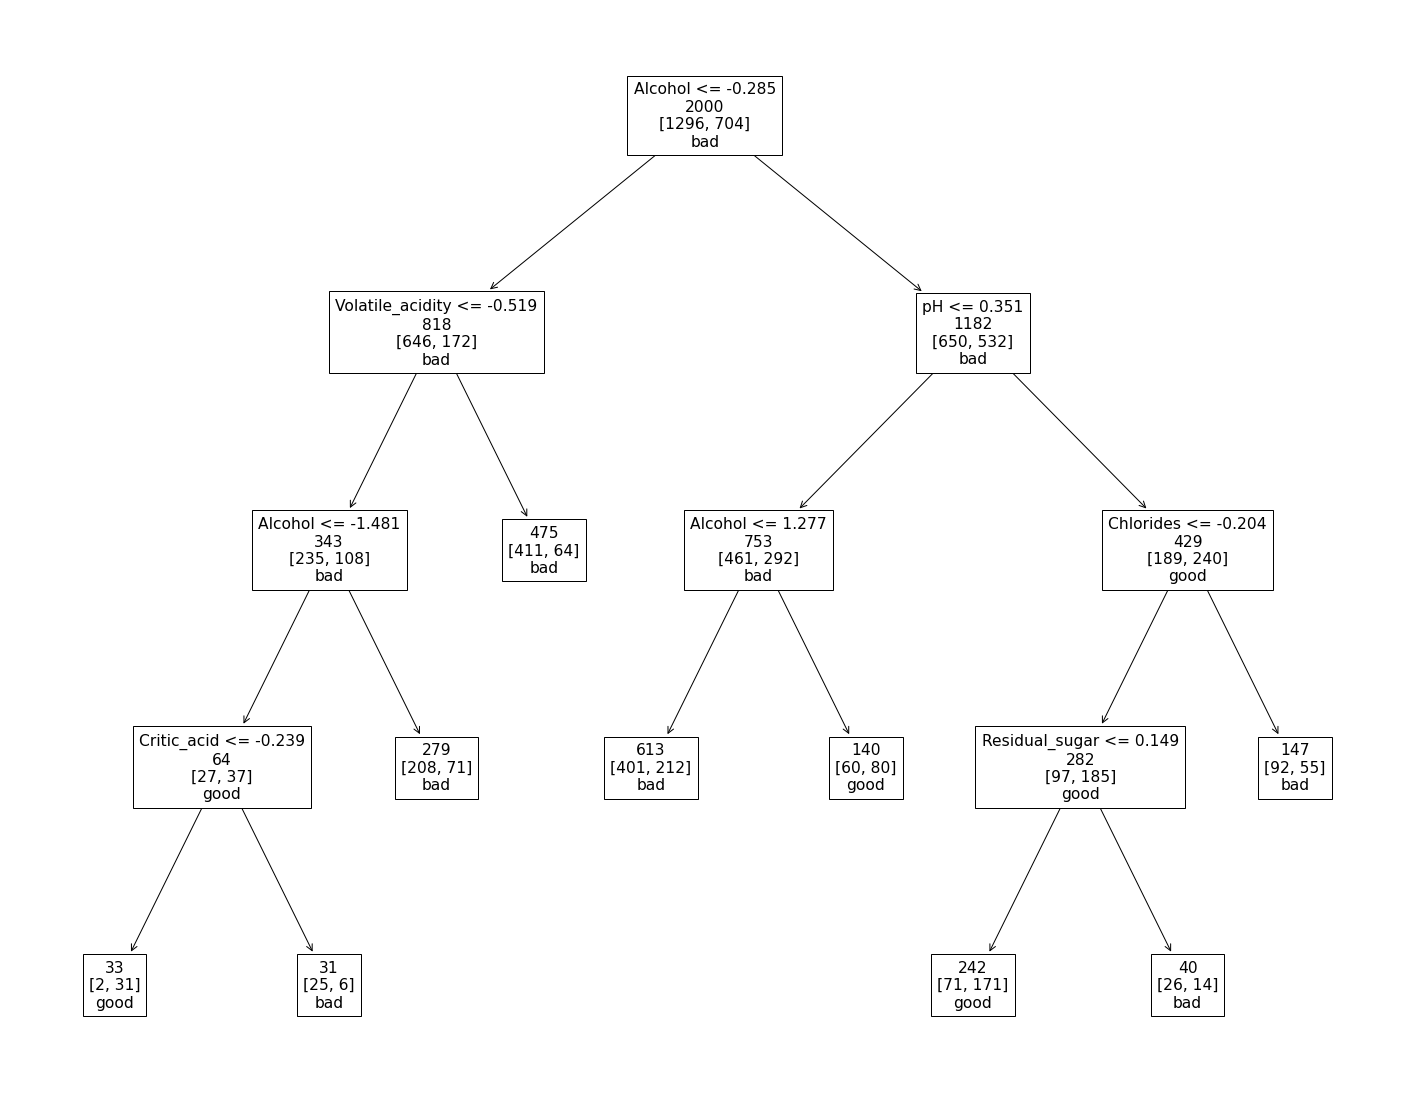

In [13]:
plot_decision_tree(decision_tree.best_model(), df_wine, 'Class')

Feature importance:

In [12]:
random_forest = RandomForest(X_train, y_train)

Fitting 5 folds for each of 58 candidates, totalling 290 fits


In [13]:
random_forest.best_params

{'criterion': 'entropy', 'n_estimators': 450, 'random_state': 0}

In [14]:
random_forest.get_accuracy(X_test, y_test)

0.7531380753138075

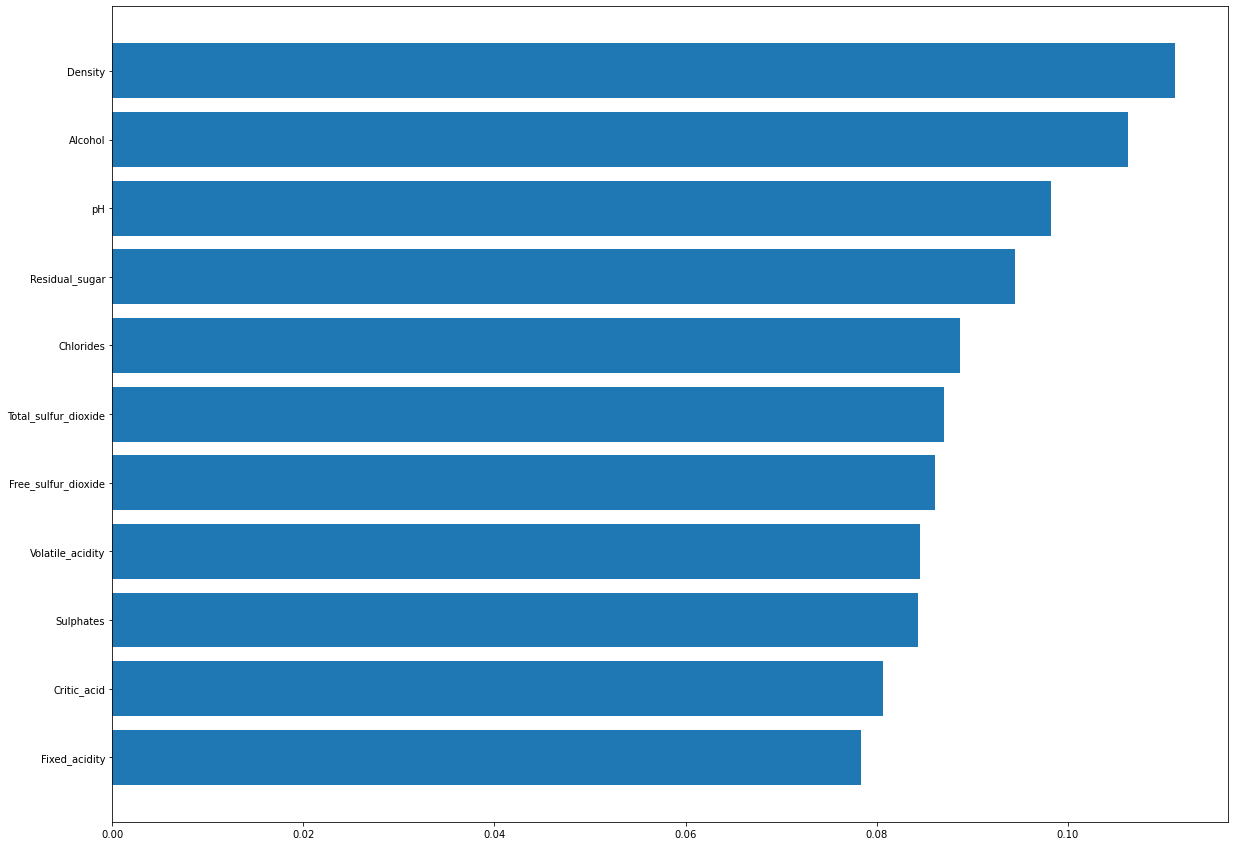

In [15]:
plot_feature_importance(random_forest.best_model(), df_wine, 'Class')

# Part 2

### Hierarchical Clustering

In [3]:
df_seeds = pd.read_csv('Data/Seeds.txt', delim_whitespace = True)
df_seeds.head(5)

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [4]:
print('Dimensions of dataset:', df_seeds.shape)

Dimensions of dataset: (210, 7)


In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(df_seeds)

linkage: complete
distance: euclidean
distance threshold: 0


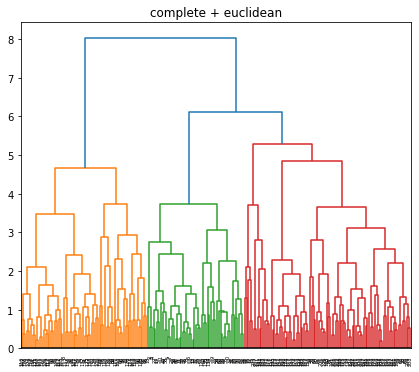

In [11]:
create_hierarchical_clustering(X, distance = 'euclidean', linkage = 'complete', distance_threshold = 0, n_clusters=None)

linkage: complete
distance: manhattan
distance threshold: 0


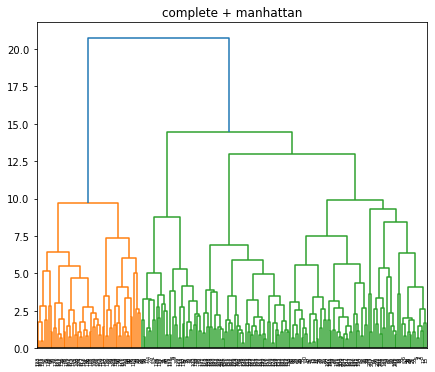

In [12]:
create_hierarchical_clustering(X, distance = 'manhattan', linkage = 'complete', distance_threshold = 0, n_clusters=None)

linkage: complete
distance: cosine
distance threshold: 0


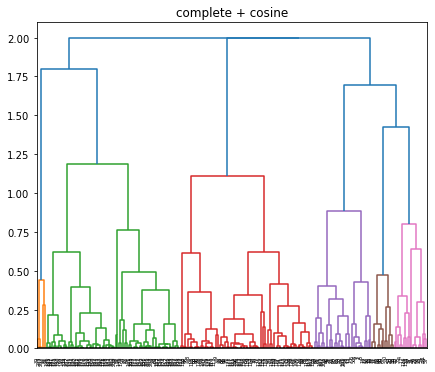

In [13]:
create_hierarchical_clustering(X, distance = 'cosine', linkage = 'complete', distance_threshold = 0, n_clusters=None)

linkage: average
distance: euclidean
distance threshold: 0


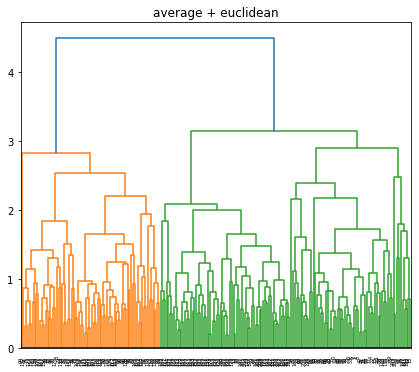

In [14]:
create_hierarchical_clustering(X, distance = 'euclidean', linkage = 'average', distance_threshold = 0, n_clusters=None)

linkage: average
distance: manhattan
distance threshold: 0


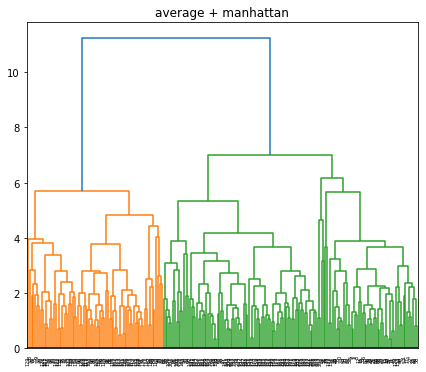

In [15]:
create_hierarchical_clustering(X, distance = 'manhattan', linkage = 'average', distance_threshold = 0, n_clusters=None)

linkage: average
distance: cosine
distance threshold: 0


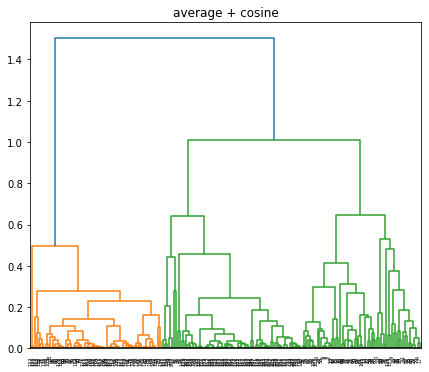

In [16]:
create_hierarchical_clustering(X, distance = 'cosine', linkage = 'average', distance_threshold = 0, n_clusters=None)

### Partitioning Based Clustering

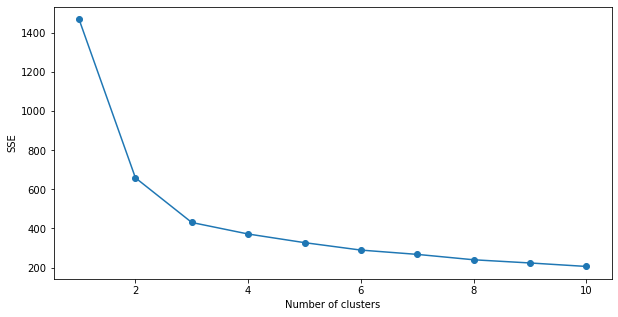

In [6]:
optimal_amount_of_clusters(X)

In [16]:
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
km.fit(X)

KMeans(init='random', n_clusters=3, random_state=0)

In [19]:
print('Number of observations in cluster 1:', list(km.labels_).count(0))
print('Number of observations in cluster 2:', list(km.labels_).count(1))
print('Number of observations in cluster 3:', list(km.labels_).count(2))

Number of observations in cluster 1: 71
Number of observations in cluster 2: 67
Number of observations in cluster 3: 72


In [20]:
km.inertia_

430.6589731513006

# Part 3

In [12]:
df_wholesale = pd.read_csv('Data/wholesale.txt', delim_whitespace = True)
df_wholesale.head(5)

,Fresh,Milk,Grocery,Frozen,DetergentsPaper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [13]:
print('Dimensions of dataset:', df_wholesale.shape)

Dimensions of dataset: (196, 6)


In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(df_wholesale)

### PCA

In [15]:
pca = PCA(n_components=6, random_state = 0)
principal_components = pca.fit_transform(X)
pca.fit(X)

PCA(n_components=6, random_state=0)

In [16]:
pca.explained_variance_ratio_

array([0.46289108, 0.30864656, 0.11896021, 0.06619432, 0.03559605,
       0.00771178])

In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46289108, 0.77153764, 0.89049785, 0.95669217, 0.99228822,
       1.        ])

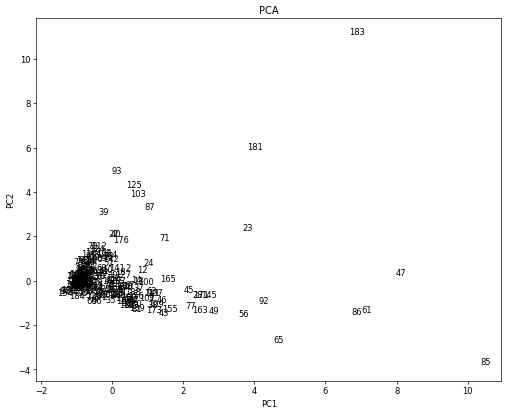

In [18]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':60})
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha = 0.0)
plt.title('PCA')
plt.xlabel("PC1")
plt.ylabel("PC2")
for i in range(len(principal_components)):
    plt.text(principal_components[i, 0], principal_components[i, 1], str(i))
plt.show()

Text(0.5, 0.92, 'Principal Component Analysis 3D')

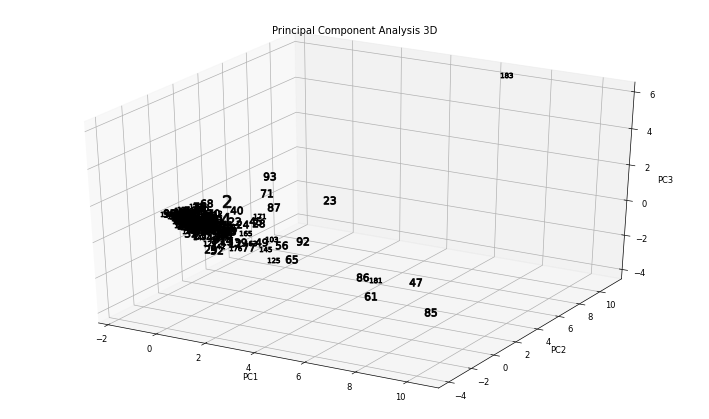

In [19]:
# Creating figure
fig = plt.figure(figsize = (15, 9))
ax = plt.axes(projection ="3d")
   
# Creating plot
#sctt = ax.scatter3D(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2],
#                    alpha = 0.8, depthshade = False, marker = 'o')

for i in range(len(principal_components)):
    ax.plot([principal_components[i,0]], [principal_components[i, 1]], [principal_components[i, 2]], marker='${}$'.format(i),
            markersize = 15, color='black')
 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Principal Component Analysis 3D')

### Multidimensional Scaling

In [20]:
dist_euclidean = euclidean_distances(X)
embedding = MDS(n_components=2, dissimilarity = 'precomputed', random_state = 0, n_jobs = -1)
mds = embedding.fit_transform(dist_euclidean)
print(mds.shape)

(196, 2)


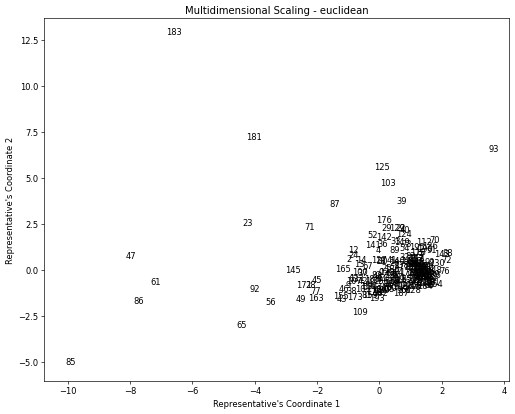

In [21]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':60})
plt.scatter(mds[:, 0], mds[:, 1], alpha = 0.0)
plt.title('Multidimensional Scaling - euclidean')
plt.xlabel("Representative's Coordinate 1")
plt.ylabel("Representative's Coordinate 2")
for i in range(len(mds)):
    plt.text(mds[i, 0], mds[i, 1], str(i))
plt.show()

In [22]:
dist_manhattan = manhattan_distances(X)
embedding = MDS(n_components=2, dissimilarity = 'precomputed', random_state = 0, n_jobs = -1)
mds = embedding.fit_transform(dist_manhattan)
print(mds.shape)

(196, 2)


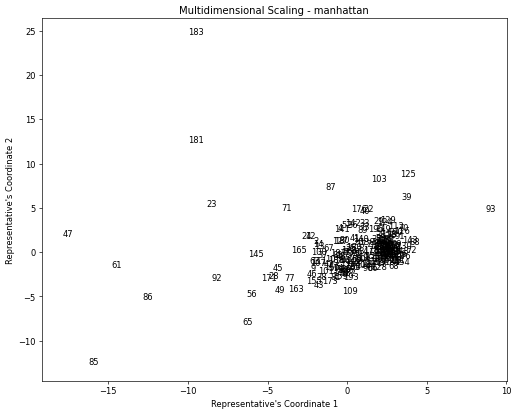

In [23]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':60})
plt.scatter(mds[:, 0], mds[:, 1], alpha = 0.0)
plt.title('Multidimensional Scaling - manhattan')
plt.xlabel("Representative's Coordinate 1")
plt.ylabel("Representative's Coordinate 2")
for i in range(len(mds)):
    plt.text(mds[i, 0], mds[i, 1], str(i))
plt.show()